In [4]:
#-- IMPORT LIBRARIES --#
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image

In [3]:
#-- DEFINE PATHS #--
class1_paths = ['03 Moderate NPDR', '04 Severe NPDR', '05 PDR', 
                '06 Mild NPDR, with DME', '07 Moderate NPDR, with DME',
                '08 Severe NPDR, with DME', '09 PDR, with DME']
class2_paths = ['01 No DR', '02 Mild NPDR']
ignore_paths = ['00 5-Field Images', '10 Ungradable']

# LOADING DATA #
data = []
labels = []

for path in class1_paths:
    folder_path = os.path.join('Documents/Baysis',path)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).resize((224,224))
        img_array = np.array(img)/255.0
        data.append(img_array)
        labels.append(1) 

for paths in class2_paths:
    folder_path = os.path.join('Documents/Baysis',path)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img  = Image.open(img_path).resize((224,224))
        img_array = np.array(img)/255.0
        data.append(img_array)
        labels.append(0)

data=np.array(data)
labels=np.array(labels)

# class_1_count = np.sum(y_train == 1)  # Number of samples in Class 1
# class_2_count = np.sum(y_train == 0)
# print(f"Class 1 (referable retinopathy) count: {class_1_count}")
# print(f"Class 2 (non-referable retinopathy) count: {class_2_count}")

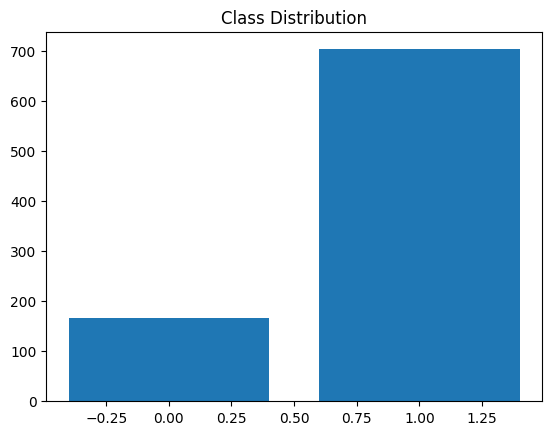

In [3]:
# CKECKING IMBALANCE #
unique, counts = np.unique(labels,return_counts=True)
plt.bar(unique,counts)
plt.title('Class Distribution')
plt.show()


In [13]:
# SPLITTING THE DATA TO TRAINING AND TESTING #
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2, stratify=labels,random_state=42)

# AUGMENTATION #
datagen = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range =0.1,
    horizontal_flip=True
)

In [ ]:
# MODEL BUILDING #
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])  #compiling the model

history= model.fit(
    datagen.flow(x_train,y_train,batch_size=32),
    validation_data=(x_test,y_test),
    epochs=10
)

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

Epoch 1/10
22/22 [==============================] - 32s 1s/step - loss: 0.6433 - accuracy: 0.8000 - val_loss: 0.4991 - val_accuracy: 0.8103
Epoch 2/10
22/22 [==============================] - 33s 1s/step - loss: 0.5120 - accuracy: 0.8086 - val_loss: 0.4910 - val_accuracy: 0.8103
Epoch 3/10
22/22 [==============================] - 34s 2s/step - loss: 0.5019 - accuracy: 0.8086 - val_loss: 0.4896 - val_accuracy: 0.8103
Epoch 4/10
 1/22 [>.............................] - ETA: 41s - loss: 0.4825 - accuracy: 0.8125

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model_tl = Model(inputs=base_model.input, outputs=predictions)
model_tl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model_tl.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
TN,FP,FN,TP = cm.ravel()

NameError: name 'x_test' is not defined

In [2]:
%history -n

   1: %history
   2: %history -n
